# Netflix revenue and streaming patterns across age and countries
Kelsey Brown, Elijah Batchelor, and Savannah Galipeau

Summary/Analysis:

The first section of our project explored how Netflix subscriber count and revenue differs across countries. We wanted to see where the bulk of Netflix profits come from and which countries are the biggest market for the company. We used a dataset that compiled the quarterly subscriber counts and revenue for fifty countries in the year 2021. Based on average subscriber count for that year, we observed that the United States held a significant portion of total subscribers. The US alone claimed over 68 million with the next highest being Brazil at over 18 million. To account for the drastic differences in each country's population, the percent subscribers for each country was also calculated. The country with the most dense population of Netflix subscribers was found to be Norway at 38% followed by New Zealand at 25% and Australia at 24%. The United States remained in the top 5 but due to it's much larger population only saw a subscriber rate of 20%. When examining yearly revenue, a similar result to the average number of subscribers was produced. The US generated just under 12 billion dollars for Netflix while the second highest (the UK) only generated 1.8 billion. The US is the number one market for Netflix when looking at country alone. Further analysis could be done with a focus on world region as that might shift what area of the world holds the most subscribers. 

After reviewing the data that we presented in our project we could see that there was a difference in pricing between countries for Netflix subscription prices. In the first representation that made it shows the totals of countries three subscription plans that Netflix has available. There are various different prices that they offer other countries. The cheapest subscription plan that is available is in Turkey while Switzerland has the most expensive plans. This can tie into the second representation that was made showing the revenue increase between two quarters in 2021. Each country saw a small increase in revenue. The countries with the most increase in revenue are the United States and Canada. 
A heat map was created showing the difference in pricing between the US and other countries. On the map we can see that the Basic Plan is close in pricing with the US but as the plans move to Standard and Premium the pricing starts to change between the US and other countries. The warmer the color the more expensive it is than the US and the cooler the color the cheaper the price is for a Netflix subscription in other countries.
With the pie charts there are a select group of countries to show which country is getting its biggest bang for its buck. After comparing both charts it looks like countries that are in Europe are getting a pretty good bang for their buck but countries in South America or countries with lower GDP seem to pay more than they can afford. 

Next we explored how age effects Netflix streaming patterns. First, I used another notebook to bin and split the larger age range of 26-51 of users into brackets of under 25-34, 35-44, and 45+. I added the age groups as their own column and saved as a new CSV to keep it a bit more manageable for myself when working with the data and to clean up my notebooks. After filtering and making sure I didn’t have any duplicates, I wanted to count the amount of users per age group and used this to make my user count/age range bar graph. The most represented age range is 35-44. I also counted devices used and made a pie chart of the devices used across users, reflecting relatively even usage. Devices used were Smart TVs, Laptops, Smartphones, and Tablets. I then created a bar chart to compare the use of devices versus age groups. When comparing the binned age groups to the devices used, we can see that the 25-34 group prefers Tablet usage, 35-44 prefers Laptop usage, and 45+ prefers Smart TV use. Comparing age groups and Subscription types, the Basic subscription type is the most popular between all binned age groups. Subscription types were almost evenly spread but we can see that Basic is the most popular by far with Standard close behind and Premium last. I would be curious to see a larger age range, especially in light of Netflix's password sharing crackdowns; it seems families tend to share Netflix accounts with younger relatives. Netflix could use that data to make decisions regarding family accounts, account sharing, targeting shows to certain age demographics, etc.

Genre preference was examined overall as well as across the top 3 countries for Netflix from the first section (US, UK, and Brazil). Our aim was to see if there was a noticeable difference in film genre performance across different countries. The dataset we used was a compiled list of the weekly top 10 films and tv shows in 2021 across 94 countries. Tv shows were filtered out of the data as the API used to pull genre information only had movies. The OMDb API was used to pull each genre and the number of times each genre was listed was used to determine popularity. We found that there was not a significant difference in genre preference across the main three countries. The top 3 genres overall were action, comedy, and drama. This trend in the data matched the three countries of focus as well. It does provide Netflix with a good basis for selecting titles to add to their library as well as picking future project for Netflix original films. They would know which genres would perform the best in terms of streams unlike those that would not such as musical, which performed the lowest across the board.   

# Netflix Revenue and Subscriber Counts

Kelsey

Question 1: How does Netflix revenue and subscriber count differ by country?

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Study data files
sub_count_path = "Data Sets/Subscriber count and revenue.csv"
population_path = "Data Sets/country population.csv"

# Read the data sets
sub_count_revenue = pd.read_csv(sub_count_path)
population_df = pd.read_csv(population_path)

In [4]:
#Make new dataframe for average number of subscribers for each country
subcount = sub_count_revenue[["Country", "# of Subscribers Q1 2021", "# of Subscribers Q2 2021", "# of Subscribers Q3 2021 (Estimate)", "# of Subscribers Q4 2021 (Estimate)"]]
#rename columns
subscriber_df = subcount.rename(columns={"# of Subscribers Q1 2021": "Subscribers Q1", 
                         "# of Subscribers Q2 2021": "Subscribers Q2", 
                         "# of Subscribers Q3 2021 (Estimate)": "Subscribers Q3", 
                         "# of Subscribers Q4 2021 (Estimate)": "Subscribers Q4"})
subscriber_df.head()


,Country,Subscribers Q1,Subscribers Q2,Subscribers Q3,Subscribers Q4
0,Argentina,4968423,5069282,5154101,5240340
1,Australia,6169026,6405917,6513101,6622078
2,Austria,927420,930017,945578,961399
3,Belgium,1639040,1643629,1671131,1699092
4,Brazil,17858800,18221334,18526213,18836193


In [5]:
#find average for each country
average_sub = subscriber_df.mean(axis=1)
subscriber_df['Average Subscribers'] = average_sub
subscriber_df.head()

,Country,Subscribers Q1,Subscribers Q2,Subscribers Q3,Subscribers Q4,Average Subscribers
0,Argentina,4968423,5069282,5154101,5240340,5108036.5
1,Australia,6169026,6405917,6513101,6622078,6427530.5
2,Austria,927420,930017,945578,961399,941103.5
3,Belgium,1639040,1643629,1671131,1699092,1663223.0
4,Brazil,17858800,18221334,18526213,18836193,18360635.0


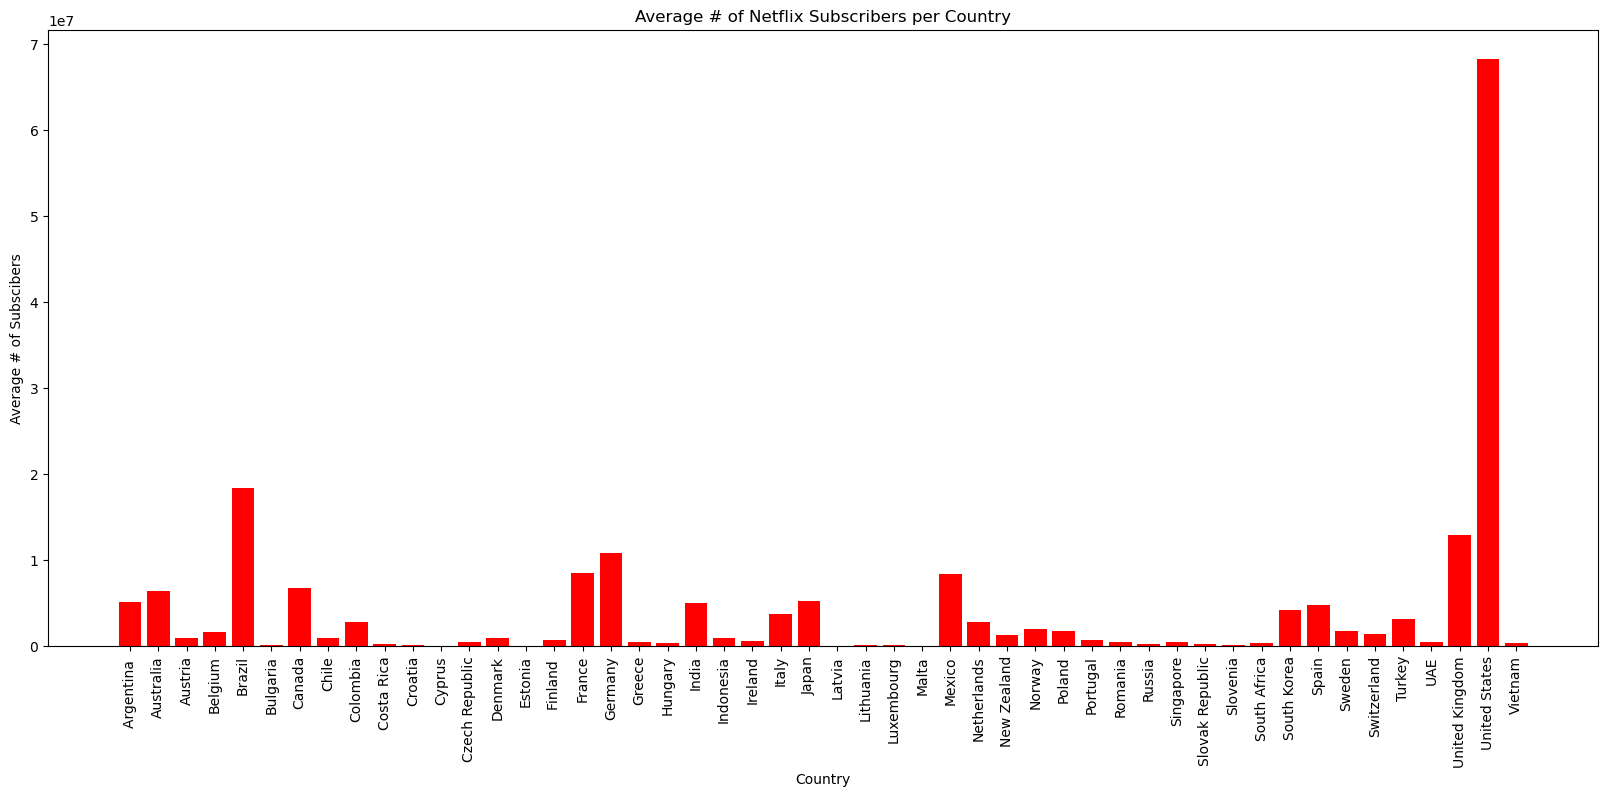

In [6]:
#Bar chart with subscriber counts
countries = subscriber_df['Country']
subscribers = subscriber_df['Average Subscribers']

plt.figure(figsize=(20,8))
plt.bar(countries, subscribers, align = "center", color = 'r')
tick_locations = [value for value in countries]
plt.xticks(tick_locations, countries, rotation = "vertical")
plt.xlabel("Country")
plt.ylabel("Average # of Subscibers")
plt.title("Average # of Netflix Subscribers per Country")

plt.show()

In [19]:
#Total average number of subscribers
total_average_subscribers = subscriber_df['Average Subscribers'].sum()
print(f"Average number of subscribers for Netflix in 2021: {total_average_subscribers}")

Average number of subscribers for Netflix in 2021: 197631768.0


In [7]:
#Find top 5 countries
top_subcount = subscriber_df.sort_values(["Average Subscribers"], ascending=False)
top_subcount[['Country', 'Average Subscribers']].head(5)

,Country,Average Subscribers
48,United States,68225541.25
4,Brazil,18360635.00
47,United Kingdom,12904021.75
17,Germany,10823937.75
16,France,8467739.25


USA dominates subscriber count with approximately 68 million subscibers. The second highest is Brazil with over 18 million. Then the UK just shy of 13 million. 

In [8]:
#Analyze subscribers by country population
#Merge dataframe
merged_df = pd.merge(subscriber_df, population_df, on="Country")
subscriber_population_df=merged_df[["Country", "Population", "Average Subscribers"]]
subscriber_population_df.head()

,Country,Population,Average Subscribers
0,Argentina,45794179,5108036.5
1,Australia,26439111,6427530.5
2,Austria,8958960,941103.5
3,Belgium,11686140,1663223.0
4,Brazil,216422446,18360635.0


In [9]:
#Find percent subscribers per country
countries = subscriber_population_df['Country']
subs = subscriber_population_df['Average Subscribers']
pop = subscriber_population_df['Population']

percent = subs/pop*100

percent_population_df = pd.DataFrame({"Country": countries,
                                     "Percent Subscribers": percent})

percent_population_df.head()

,Country,Percent Subscribers
0,Argentina,11.154336
1,Australia,24.310691
2,Austria,10.504607
3,Belgium,14.232441
4,Brazil,8.483702


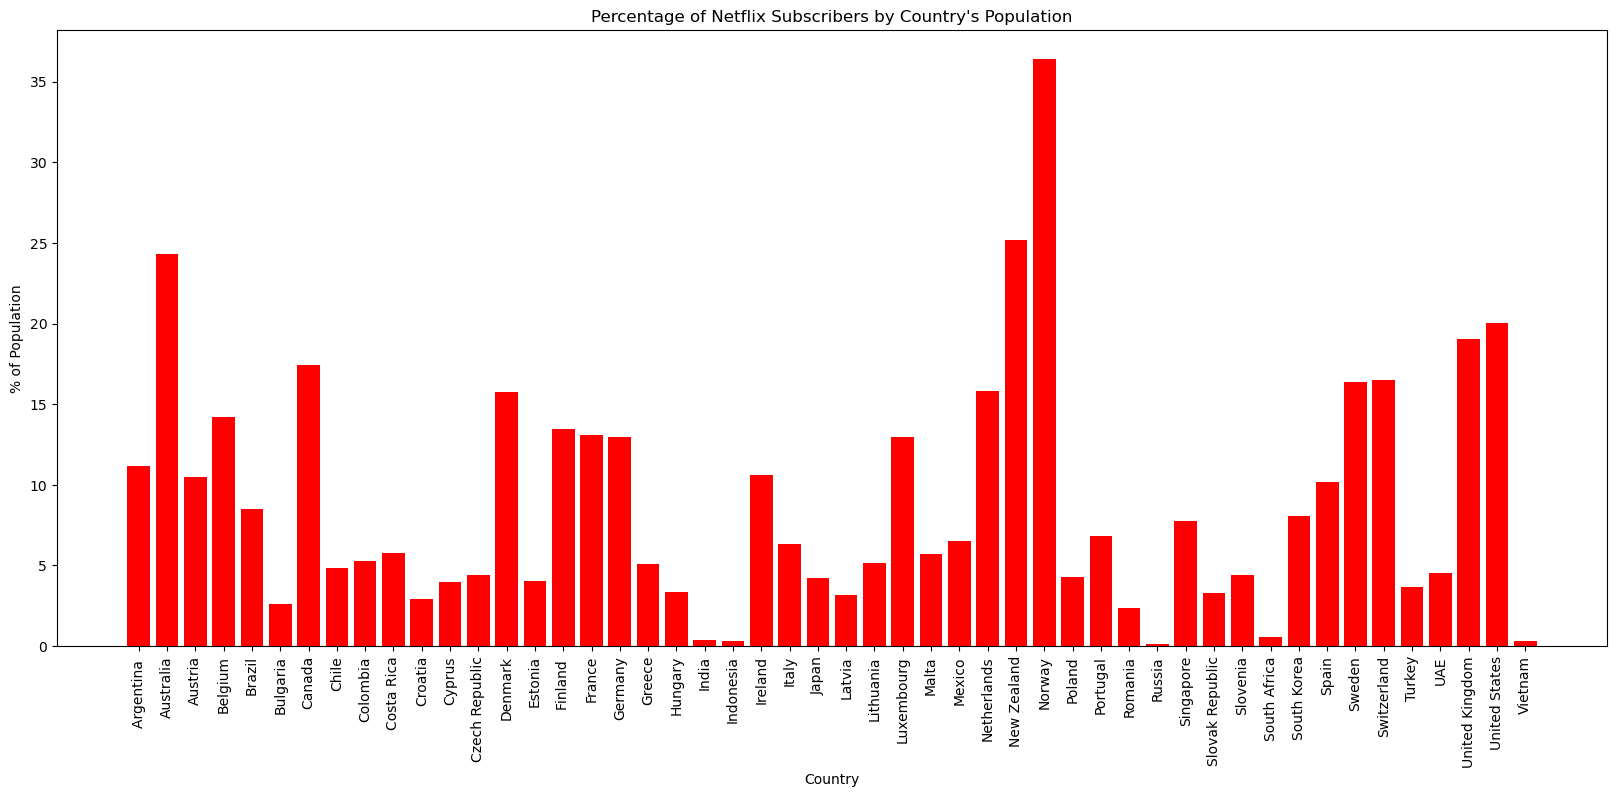

In [10]:
#Create Chart
countries = percent_population_df['Country']
subscribers = percent_population_df['Percent Subscribers']

plt.figure(figsize=(20,8))
plt.bar(countries, subscribers, align = "center", color = 'r')
tick_locations = [value for value in countries]
plt.xticks(tick_locations, countries, rotation = "vertical")
plt.xlabel("Country")
plt.ylabel("% of Population")
plt.title("Percentage of Netflix Subscribers by Country's Population")

plt.show()

In [12]:
top_percent = percent_population_df.sort_values(["Percent Subscribers"], ascending=False)
top_percent["Percent Subscribers"] = top_percent["Percent Subscribers"].map("{:,.2f}%".format)
top_percent.head(5)

,Country,Percent Subscribers
32,Norway,36.38%
31,New Zealand,25.17%
1,Australia,24.31%
48,United States,20.07%
47,United Kingdom,19.05%


When changed to percent subscribers by country's population, there's a significant difference to the previous chart. The US and UK are in the top 5 again but drop in position. From place 1 and 3 to 4 and 5. Norway is the highest at 36%. 

In [13]:
#Make a new dataframe for revenue by country
quarterly_revenue_df = sub_count_revenue[["Country", "Q1 2021 Revenue $", "Q2 2021 Revenue $", "Q3 2021 Revenue $ (Estimate)", "Q4 2021 Revenue $ (Estimate)"]]
#rename columns
total_revenue_df = quarterly_revenue_df.rename(columns={"Q1 2021 Revenue $": "Q1 Revenue",
                           "Q2 2021 Revenue $": "Q2 Revenue",
                           "Q3 2021 Revenue $ (Estimate)": "Q3 Revenue" ,
                           "Q4 2021 Revenue $ (Estimate)": "Q4 Revenue"})
total_revenue_df.head()

,Country,Q1 Revenue,Q2 Revenue,Q3 Revenue,Q4 Revenue
0,Argentina,110149942,114058849,115967282,117907646
1,Australia,179703740,187180896,190312806,193497120
2,Austria,32162926,32531987,33076312,33629745
3,Belgium,56841907,57494153,58456146,59434234
4,Brazil,395929594,409980005,416839790,423814354


In [14]:
#Find yearly revenue and add to dataframe
yearly_revenue = total_revenue_df.sum(axis=1)
total_revenue_df['Yearly Revenue'] = yearly_revenue
total_revenue_df.head()

,Country,Q1 Revenue,Q2 Revenue,Q3 Revenue,Q4 Revenue,Yearly Revenue
0,Argentina,110149942,114058849,115967282,117907646,458083719
1,Australia,179703740,187180896,190312806,193497120,750694562
2,Austria,32162926,32531987,33076312,33629745,131400970
3,Belgium,56841907,57494153,58456146,59434234,232226440
4,Brazil,395929594,409980005,416839790,423814354,1646563743


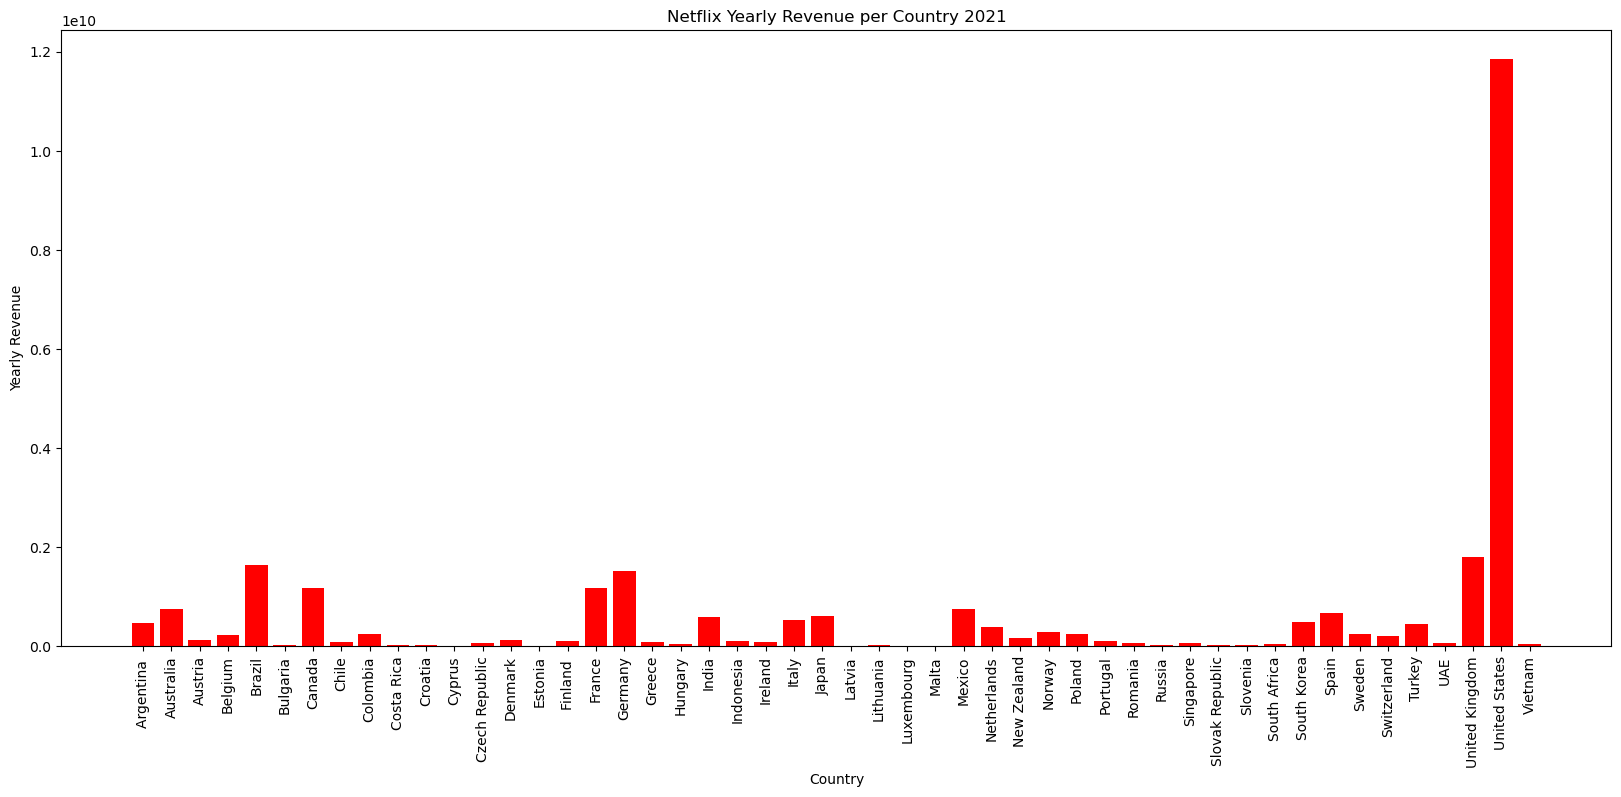

In [15]:
#Create Chart
countries = total_revenue_df['Country']
revenue = total_revenue_df['Yearly Revenue']

plt.figure(figsize=(20,8))
plt.bar(countries, revenue, align = "center", color = 'r')
tick_locations = [value for value in countries]
plt.xticks(tick_locations, countries, rotation = "vertical")
plt.xlabel("Country")
plt.ylabel("Yearly Revenue")
plt.title("Netflix Yearly Revenue per Country 2021")

plt.show()

In [16]:
#find total yearly revenue
total_yearly_revenue = total_revenue_df['Yearly Revenue'].sum()
print(f"Total yearly revenue for Netflix: ${total_yearly_revenue}")

Total yearly revenue for Netflix: $27806468262


In [17]:
#Find top 5 countries
top_countries = total_revenue_df.sort_values(["Yearly Revenue"], ascending=False)
top_countries[['Country', 'Yearly Revenue']].head(5)

,Country,Yearly Revenue
48,United States,11845118750
47,United Kingdom,1801715820
4,Brazil,1646563743
17,Germany,1511285419
16,France,1182302686


The US contributes the greatest to the yearly Netflix revenue at over $11 billion. Note that these are the same top five countries as the top five by subscriber counts. The difference being that the UK and Brazil swapped places, which could be due to varying subscription plan prices in each country. 

In [20]:
#Percentage of Netflix subscribers that are from the US
us_sub_percent = (68225541.25/total_average_subscribers)*100
print(f'Percentage of Netflix subscribers from the US {us_sub_percent}')
#Percentage of Netflix revenue generated from the US
us_rev_percent = (11845118750/total_yearly_revenue)*100
print(f'Percentage of Netflix revenue from the US {us_rev_percent}')

Percentage of Netflix subscribers from the US 34.52154577193278
Percentage of Netflix revenue from the US 42.59842939560722


Overall, the United States is the main market/demographic for Netflix. 34% of total Netflix subscribers hail from the United States and the country alone generates 42% of the company's yearly revenue. 

# Distribution/popularity of the three subscription plans across different countries 

Elijah

Questions: Which Sub plans are popular in each country & how does that compare to the US? Which country is getting the best bang for its buck?

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

netflix_subs_path = 'country rev and subs.csv'
netflix_rev_path = 'netflix price in different countries.csv'
gdp_per_capita_path = 'gdp_per_capita.csv'

netflix_subs = pd.read_csv(netflix_subs_path)
netflix_rev = pd.read_csv(netflix_rev_path)
gdp_per_capita = pd.read_csv(gdp_per_capita_path)

combined_data = pd.merge(netflix_subs, netflix_rev, on='Country')

combined_data.head()

,Country,# of Subscribers Q1 2021,Average Monthly Revenue per Paying Membership - Q1 2021 ($),Q1 2021 Revenue $,# of Subscribers Q2 2021,Average Monthly Revenue per Paying Membership - Q2 2021 ($),Q2 2021 Revenue $,# of Subscribers Q3 2021 (Estimate),Q3 2021 Revenue $ (Estimate),# of Subscribers Q4 2021 (Estimate),Q4 2021 Revenue $ (Estimate),Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,Australia,6169026,9.71,179703740,6405917,9.74,187180896,6513101,190312806,6622078,193497120,6114,4050,2064,7.84,12.12,16.39
1,Austria,927420,11.56,32162926,930017,11.66,32531987,945578,33076312,961399,33629745,5640,3779,1861,9.03,14.67,20.32
2,Belgium,1639040,11.56,56841907,1643629,11.66,57494153,1671131,58456146,1699092,59434234,4990,3374,1616,10.16,15.24,20.32
3,Brazil,17858800,7.39,395929594,18221334,7.50,409980005,18526213,416839790,18836193,423814354,4972,3162,1810,4.61,7.11,9.96
4,Bulgaria,171600,11.56,5951088,172080,11.66,6019375,174960,6120091,177887,6222493,6797,4819,1978,9.03,11.29,13.54


In [3]:
#present data for different subscription plans in different countries
#split data into basic, standard and premium
#use netflix price in different country csv first

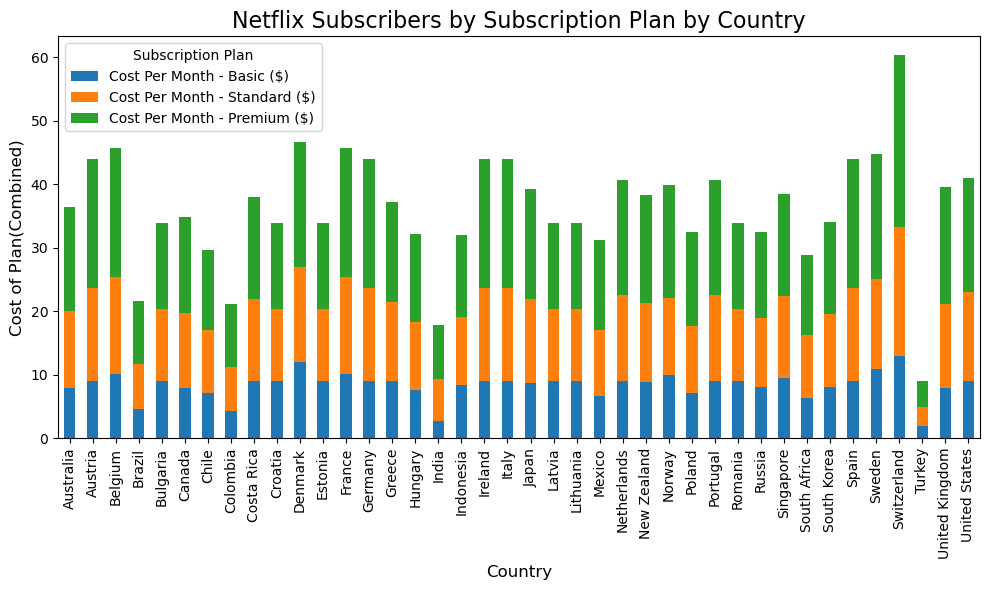

In [4]:
ax = combined_data.plot(x='Country', y=['Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)'], kind='bar', stacked=True, figsize=(10, 6))

ax.set_title('Netflix Subscribers by Subscription Plan by Country', fontsize=16)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Cost of Plan(Combined)', fontsize=12)
ax.legend(title='Subscription Plan', fontsize=10)

plt.tight_layout()
plt.show()

In [5]:
#make a data presentation on average spendings on subscription plans in different countries.

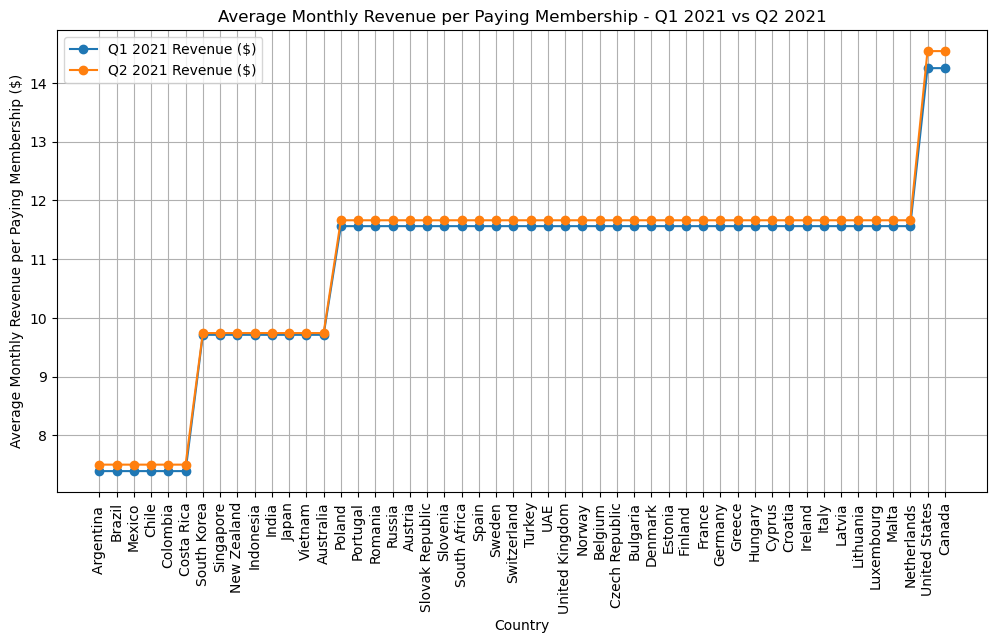

In [13]:
revenue_df = pd.DataFrame({
    'Country': netflix_subs['Country'],
    'Q1 2021 Revenue ($)': netflix_subs['Average Monthly Revenue per Paying Membership - Q1 2021 ($)'],
    'Q2 2021 Revenue ($)': netflix_subs['Average Monthly Revenue per Paying Membership - Q2 2021 ($)']
})

revenue_df.sort_values(by='Q1 2021 Revenue ($)', inplace=True)

revenue_df.set_index('Country', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(revenue_df.index, revenue_df['Q1 2021 Revenue ($)'], marker='o', label='Q1 2021 Revenue ($)')
plt.plot(revenue_df.index, revenue_df['Q2 2021 Revenue ($)'], marker='o', label='Q2 2021 Revenue ($)')
plt.xlabel('Country')
plt.ylabel('Average Monthly Revenue per Paying Membership ($)')
plt.title('Average Monthly Revenue per Paying Membership - Q1 2021 vs Q2 2021')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

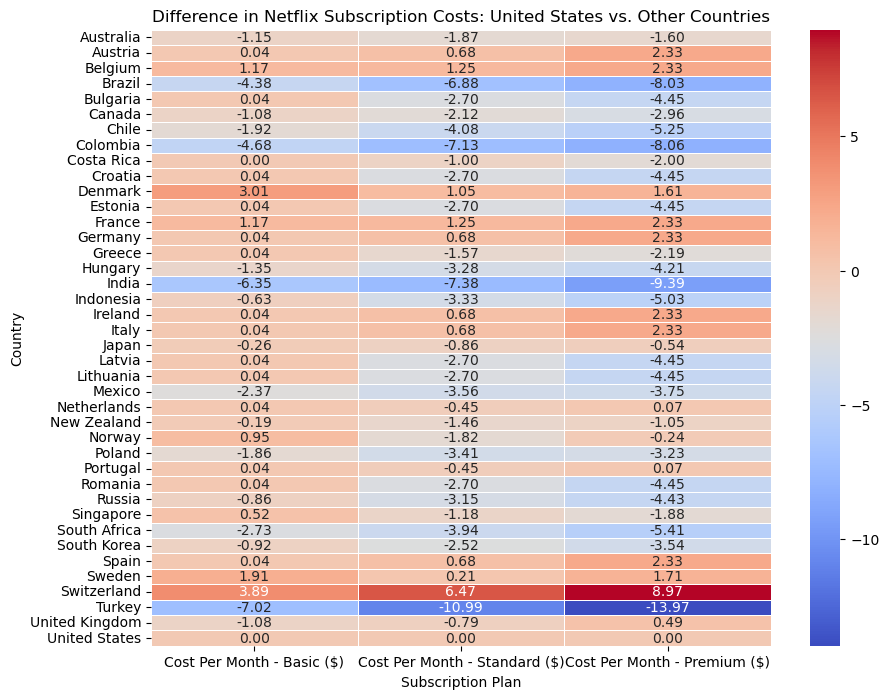

In [7]:
heatmap_data = combined_data[['Country', 'Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)']]

heatmap_data.set_index('Country', inplace=True)

us_subscription_costs = heatmap_data.loc['United States']

heatmap_data_diff = heatmap_data.sub(us_subscription_costs, axis=1)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_diff, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Difference in Netflix Subscription Costs: United States vs. Other Countries')
plt.xlabel('Subscription Plan')
plt.ylabel('Country')
plt.show()

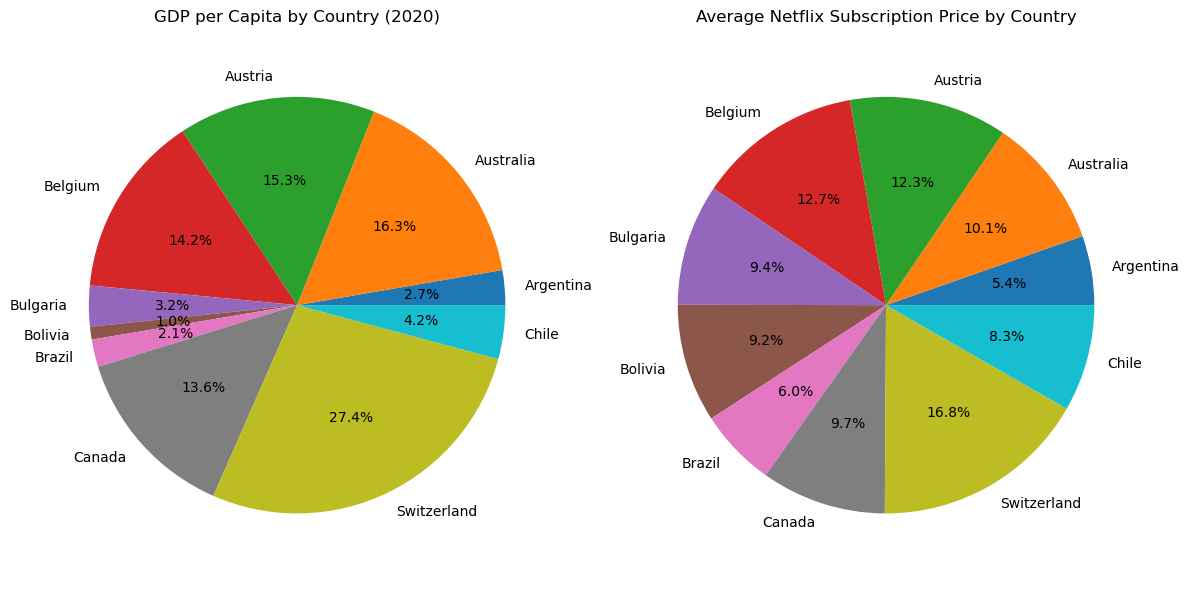

In [8]:
merged_data = pd.merge(gdp_per_capita, netflix_rev, on='Country')

merged_data = merged_data[['Country', '2020', 'Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)']].head(10)

merged_data = merged_data.dropna()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(merged_data['2020'], labels=merged_data['Country'], autopct='%1.1f%%')
plt.title('GDP per Capita by Country (2020)')
plt.axis('equal')

merged_data['Average Subscription Price'] = merged_data[['Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)']].mean(axis=1)

merged_data = merged_data.dropna()

plt.subplot(1, 2, 2)
plt.pie(merged_data['Average Subscription Price'], labels=merged_data['Country'], autopct='%1.1f%%')
plt.title('Average Netflix Subscription Price by Country')
plt.axis('equal')

plt.tight_layout()
plt.show()

# Streaming Patterns in Age Groups

Savannah

Questions: Which age groups are using which devices to watch Netflix? Is there a difference in the distribution of subscription types across age groups?


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline
import seaborn as sns

In [3]:
csv_path = Path("Edited Netflix Userbase.csv")
netflix_user_df = pd.read_csv(csv_path)

netflix_user_df.drop(['User ID'],axis=1, inplace=True)

netflix_user_df.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Netflix User Age Range
0,Basic,10,15-01-22,10/6/23,United States,28,Male,Smartphone,1 Month,25-34
1,Premium,15,5/9/21,22-06-23,Canada,35,Female,Tablet,1 Month,25-34
2,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month,35-44
3,Standard,12,10/7/22,26-06-23,Australia,51,Female,Laptop,1 Month,45+
4,Basic,10,1/5/23,28-06-23,Germany,33,Male,Smartphone,1 Month,25-34


In [4]:
netflix_user_df.count()

Subscription Type         2500
Monthly Revenue           2500
Join Date                 2500
Last Payment Date         2500
Country                   2500
Age                       2500
Gender                    2500
Device                    2500
Plan Duration             2500
Netflix User Age Range    2500
dtype: int64

In [5]:
netflix_user_df = netflix_user_df.dropna(how='any')

In [6]:
netflix_user_df.dtypes

Subscription Type         object
Monthly Revenue            int64
Join Date                 object
Last Payment Date         object
Country                   object
Age                        int64
Gender                    object
Device                    object
Plan Duration             object
Netflix User Age Range    object
dtype: object

In [7]:
netflix_user_df = netflix_user_df.astype({"Age": str}, errors='raise')

In [8]:
netflix_user_df['Age'].dtype

dtype('O')

In [9]:
netflix_user_df['Device'].value_counts()

Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: Device, dtype: int64

In [10]:
netflix_user_df['Age'].value_counts()

39    116
30    116
28    115
31    115
41    114
47    111
37    107
35    105
29    104
40    103
42    102
48    101
46     99
36     99
49     97
43     94
33     93
51     93
32     92
45     89
38     89
34     88
27     87
44     86
50     84
26      1
Name: Age, dtype: int64

In [11]:
netflix_user_df['Netflix User Age Range'].value_counts()

35-44    999
25-34    916
45+      585
Name: Netflix User Age Range, dtype: int64

In [12]:
if netflix_user_df.duplicated().any():
    print("Duplicates found!")
else:
    print("No duplicates found.")

No duplicates found.


In [13]:
print(netflix_user_df["Age"].max())
print(netflix_user_df["Age"].min())

51
26


In [14]:
age_groups = netflix_user_df.groupby('Netflix User Age Range')

count_ages = age_groups['Netflix User Age Range'].count()

count_ages

Netflix User Age Range
25-34    916
35-44    999
45+      585
Name: Netflix User Age Range, dtype: int64

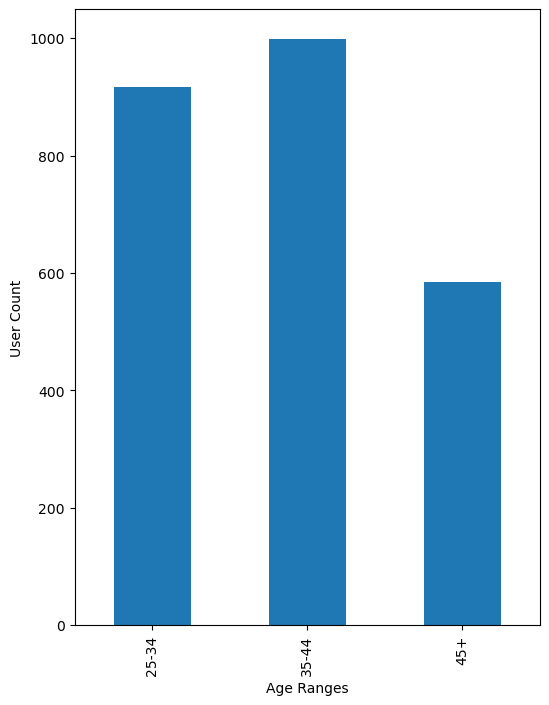

In [15]:
count_chart = count_ages.plot(kind='bar', figsize=(6,8))


count_chart.set_xlabel("Age Ranges")
count_chart.set_ylabel("User Count")

plt.show()

The largest age group of Netflix users in this study is 35-44 years old with 25-34 not to far behind. However, there is signficantly less users ages 45 and up. 

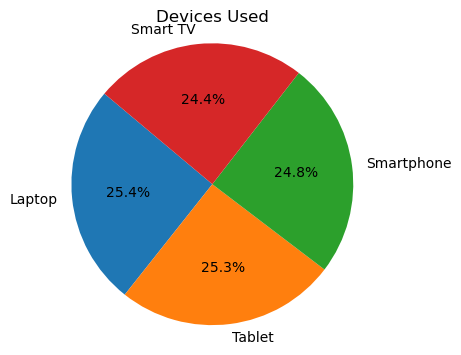

In [16]:
plt.figure(figsize=(4, 4))
plt.pie(netflix_user_df['Device'].value_counts(),labels=netflix_user_df['Device'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Devices Used')
plt.axis('equal')
plt.show()

The overall distribution of the four streaming devices are extremely even.

In [17]:
netflix_user_df['Device'].value_counts()

Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: Device, dtype: int64

In [18]:
netflix_user_df.groupby(by=["Device", "Netflix User Age Range"], as_index=False).size()

,Device,Netflix User Age Range,size
0,Laptop,25-34,221
1,Laptop,35-44,266
2,Laptop,45+,149
3,Smart TV,25-34,231
4,Smart TV,35-44,228
5,Smart TV,45+,151
6,Smartphone,25-34,227
7,Smartphone,35-44,258
8,Smartphone,45+,136
9,Tablet,25-34,237


In [19]:
print (netflix_user_df.groupby(['Device','Netflix User Age Range']).size().unstack(fill_value=0))

Netflix User Age Range  25-34  35-44  45+
Device                                   
Laptop                    221    266  149
Smart TV                  231    228  151
Smartphone                227    258  136
Tablet                    237    247  149


<Axes: xlabel='Device'>

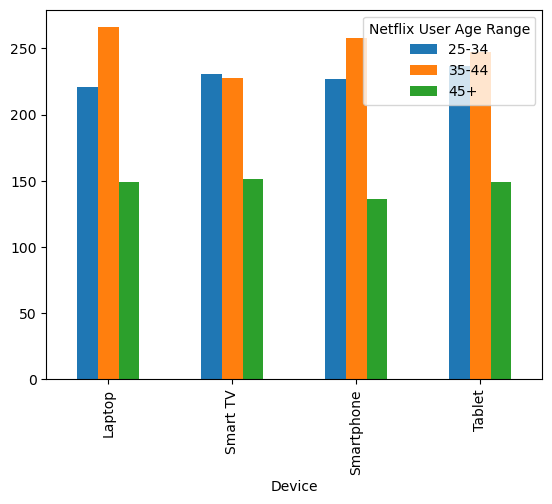

In [20]:
netflix_user_df.groupby(['Device','Netflix User Age Range']).size().unstack(fill_value=0).plot.bar()

When streaming devices are broken up by age group, there are minimal differences between the distribution of streaming devices. This finding goes against are initial hypothesis that the younger age group would be more prone to using devices alternative to a TV while the older generation would stream the majority of time on a TV. 

<Axes: xlabel='Subscription Type'>

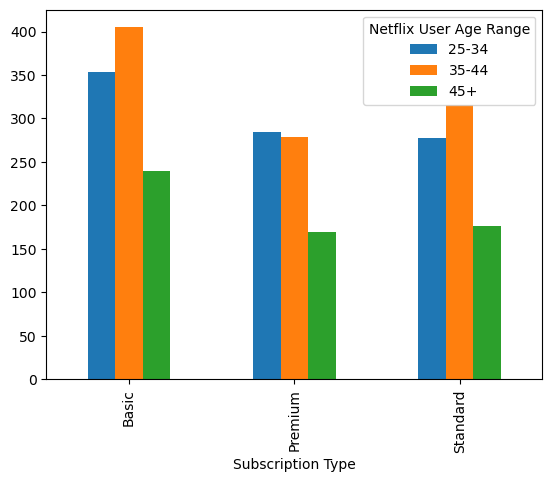

In [21]:
netflix_user_df.groupby(['Subscription Type','Netflix User Age Range']).size().unstack(fill_value=0).plot.bar()

The basic Netflix plan is the most popular across all three age groups. We hypothesized that the standard and premium packages may be more popular for the older age groups as that would be a bigger population of families and they would need to be able to stream on more than one device simultaneously. 

In [22]:
netflix_user_df.groupby(by=["Subscription Type", "Netflix User Age Range"], as_index=False).size()

,Subscription Type,Netflix User Age Range,size
0,Basic,25-34,354
1,Basic,35-44,405
2,Basic,45+,240
3,Premium,25-34,285
4,Premium,35-44,279
5,Premium,45+,169
6,Standard,25-34,277
7,Standard,35-44,315
8,Standard,45+,176


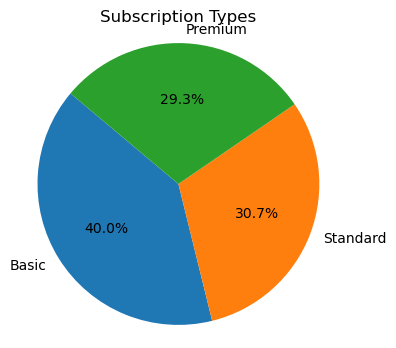

In [23]:
plt.figure(figsize=(4, 4))
plt.pie(netflix_user_df['Subscription Type'].value_counts(),labels=netflix_user_df['Subscription Type'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Subscription Types')
plt.axis('equal')
plt.show()

The basic subscription plan in the most popular overall and we see no big difference between the popularity of premium and standard.

# Genre Popularity

Kelsey

Question 4: Is there a difference in the popularity of film genres across the world?

In [14]:
#import file
top_10_path = "Data Sets/Top 10 by country.csv"

# Read the data set
top_10 = pd.read_csv(top_10_path)
filtered_top_10 = top_10[["country_name", "category", "show_title"]]
filtered_top_10

,country_name,category,show_title
0,Argentina,Films (English),Red Notice
1,Argentina,Films (English),Love Hard
2,Argentina,Films (English),Yara
3,Argentina,Films (English),211
4,Argentina,Films (English),The Harder They Fall
...,...,...,...
37595,Vietnam,TV (English),Reply 1988
37596,Vietnam,TV (English),"Nevertheless,"
37597,Vietnam,TV (English),Too Hot to Handle
37598,Vietnam,TV (English),Record of Ragnarok


In [15]:
#make a dataframe for just films
films_df = filtered_top_10.loc[filtered_top_10['category']=='Films (English)']
films_df

,country_name,category,show_title
0,Argentina,Films (English),Red Notice
1,Argentina,Films (English),Love Hard
2,Argentina,Films (English),Yara
3,Argentina,Films (English),211
4,Argentina,Films (English),The Harder They Fall
...,...,...,...
37585,Vietnam,Films (English),Camellia Sisters
37586,Vietnam,Films (English),12 Strong
37587,Vietnam,Films (English),Glitch
37588,Vietnam,Films (English),Pokémon Detective Pikachu


In [16]:
#Get rid of film title duplicates to lessen the number of API requests
repeat_films = films_df['show_title'].unique()
print(len(repeat_films))

1124


In [18]:
#Use OMDB to pull genre's for each film. 
#Used api_exceptions_solution as example in case titles are not found
import requests
import json
from config import api_key

url = f"http://www.omdbapi.com/?apikey={api_key}&t="
movies = repeat_films
titles = []
genres = []

for movie in movies:
    response = requests.get(url + movie).json()
    
    try:
        titles.append(response['Title'])
        genres.append(response['Genre'])
        print(f'{response["Title"]}: {response["Genre"]}')
        
    except:
        print("Title not found")
        pass



Red Notice: Action, Comedy, Thriller
Love Hard: Comedy, Romance
Yara: Crime, Drama, Thriller
211: Action, Drama, Thriller
The Harder They Fall: Action, Drama, Western
Army of Thieves: Action, Comedy, Crime
7 Prisoners: Crime, Drama
Father Christmas Is Back: Comedy
Just Go with It: Comedy, Romance
Amina: Action, Adventure, Biography
The Girl in the Spider's Web: Action, Crime, Drama
Title not found
Army of the Dead: Action, Crime, Drama
Only Mine: Drama, Mystery, Thriller
Hypnotic: Mystery, Thriller
Final Score: Action, Drama, Thriller
A Dog's Journey: Adventure, Comedy, Drama
Night Teeth: Action, Crime, Drama
Stuck Together: Comedy
The Forgotten Battle: Drama, War
Venom: Action, Adventure, Sci-Fi
In for a Murder: Comedy, Thriller
The Trip: Action, Comedy, Horror
Street Kings: Action, Crime, Thriller
What Happens in Vegas: Comedy, Romance
Gran Torino: Drama
The Four of Us: Comedy, Drama, Romance
My Brother, My Sister: Drama
Ma: Horror, Mystery, Thriller
The Guilty: Crime, Drama, Thrille

Man of Tai Chi: Action, Drama
The November Man: Action, Thriller
Along Came a Spider: Drama, Thriller
Grown Ups 2: Comedy
Rampage: Action, Adventure, Sci-Fi
The Sum of All Fears: Action, Drama, Thriller
The Longest Yard: Comedy, Crime, Sport
Legally Blonde: Comedy, Romance
White House Down: Action, Drama, Thriller
Tomb Raider: Action, Adventure, Fantasy
The Physician: Adventure, Drama, History
Title not found
Ready Player One: Action, Adventure, Sci-Fi
The Angry Birds Movie 2: Animation, Action, Adventure
Just Mercy: Biography, Crime, Drama
Shiny_Flakes: The Teenage Drug Lord: Documentary, Biography, Crime
The Good Liar: Crime, Drama, Mystery
The Kissing Booth: Comedy, Romance
The Kissing Booth 2: Comedy, Romance
Creed II: Action, Drama, Sport
Looney Tunes: Back in Action: Animation, Adventure, Comedy
Doctor Sleep: Drama, Fantasy, Horror
Once Upon a Time in Hollywood: Comedy, Drama
Homefront: Action, Crime, Thriller
The Magnificent Seven: Action, Adventure, Drama
Ghost Rider: Action, F

Hubie Halloween: Comedy, Horror, Mystery
Hellboy: Action, Adventure, Fantasy
The General's Daughter: Crime, Drama, Mystery
Despicable Me 2: Animation, Adventure, Comedy
Despicable Me: Animation, Adventure, Comedy
Dark Shadows: Comedy, Fantasy, Horror
The Ice Road: Action, Adventure, Thriller
Knock Knock: Crime, Drama, Thriller
The Poison Rose: Crime, Mystery, Thriller
The Wolf of Wall Street: Biography, Comedy, Crime
Code 8: Action, Crime, Drama
Stardust: Adventure, Family, Fantasy
Edge of Tomorrow: Action, Adventure, Sci-Fi
Straight Outta Compton: Biography, Drama, History
Yesterday: Comedy, Fantasy, Music
The Last Castle: Action, Drama, Thriller
The Lego Movie: Animation, Action, Adventure
Title not found
The Equalizer: Action, Crime, Thriller
Double Jeopardy: Crime, Drama, Mystery
Rocketman: Biography, Drama, Music
Bob Ross: Happy Accidents, Betrayal & Greed: Documentary
Wrath of Man: Action, Crime, Thriller
The Vault: Action, Adventure, Thriller
Inside Man: Crime, Drama, Mystery
Un

Man in Love: Drama, Romance
Title not found
Soekarno: Biography, Drama, History
The Hitman's Bodyguard: Action, Comedy, Crime
Ali: Biography, Drama, Sport
Deep: Drama, Mystery, Sci-Fi
Deck the Halls: Comedy, Family
Out of Death: Crime, Thriller
Ransom: Action, Crime, Thriller
Dark Waters: Biography, Drama, History
The Next Three Days: Action, Crime, Drama
Falling for Figaro: Comedy, Romance
The First Wives Club: Comedy
Hotel Transylvania: Animation, Adventure, Comedy
Luce: Drama, Mystery, Thriller
Spider-Man 3: Action, Adventure, Sci-Fi
Shazam!: Action, Adventure, Comedy
Office Christmas Party: Comedy
The Amazing Spider-Man: Action, Adventure, Sci-Fi
Pain & Gain: Action, Comedy, Crime
Papillon: Biography, Crime, Drama
Django Unchained: Drama, Western
Shot Caller: Crime, Drama, Thriller
The Blind Side: Biography, Drama, Sport
Fear of Rain: Drama, Horror, Thriller
Something's Gotta Give: Comedy, Drama, Romance
The Lego Movie 2: The Second Part: Animation, Action, Adventure
The Mule: Crim

Boy: Comedy, Drama
Infamous: Biography, Crime, Drama
The Missing: Adventure, Drama, Thriller
Captive State: Action, Horror, Sci-Fi
The SpongeBob Movie: Sponge Out of Water: Animation, Adventure, Comedy
Omo Ghetto: The Saga: Action, Adventure, Comedy
Alter Ego: Drama, Romance
Special Jollof: Drama
Gone: Action, Adventure, Mystery
Swallow: Drama, Thriller
Jupiter Ascending: Action, Adventure, Sci-Fi
King of Boys: Crime, Drama
Shadow Parties: Action
The Ghost and the Tout: Comedy, Fantasy
Quam's Money: Comedy, Crime
Nneka the Pretty Serpent: Horror, Mystery
Kambili: The Whole 30 Yards: Romance
Unroyal: Comedy, Romance
Slay: Comedy
Space Station 76: Comedy, Drama, Sci-Fi
Brother Jekwu: Comedy
Ijé: The Journey: Drama
2 Weeks in Lagos: Romance
Day of Destiny: Adventure, Drama, Sci-Fi
Sanitation Day: Thriller
RattleSnake: The Ahanna Story: Drama
Finding Hubby: Drama, Romance
Last Request: Short
Deranged: Drama, Horror, Thriller
Voiceless: Thriller
A Way Back Home: Drama
The Last of the Mohica

In [19]:
movie_genre = pd.DataFrame({
    'show_title': titles,
    'genre(s)': genres
})
movie_genre.head()

,show_title,genre(s)
0,Red Notice,"Action, Comedy, Thriller"
1,Love Hard,"Comedy, Romance"
2,Yara,"Crime, Drama, Thriller"
3,211,"Action, Drama, Thriller"
4,The Harder They Fall,"Action, Drama, Western"


Important to note that 180 titles were not found in OMDb out of the 1124 and were thereby not included.

In [20]:
#merge new df with original to pair genre to each film title.
genres_country = pd.merge(films_df, movie_genre, on="show_title")
organized_genres_country=genres_country.sort_values('country_name')
organized_genres_country

,country_name,category,show_title,genre(s)
0,Argentina,Films (English),Red Notice,"Action, Comedy, Thriller"
8643,Argentina,Films (English),The Water Man,"Adventure, Drama, Family"
8594,Argentina,Films (English),Rust Creek,"Crime, Drama, Thriller"
8593,Argentina,Films (English),Rust Creek,"Crime, Drama, Thriller"
8571,Argentina,Films (English),Penguin Bloom,"Biography, Drama"
...,...,...,...,...
12703,Vietnam,Films (English),Deep Impact,"Action, Drama, Sci-Fi"
14079,Vietnam,Films (English),Sniper: Assassin's End,"Action, Thriller"
10260,Vietnam,Films (English),Nightbooks,"Family, Fantasy, Horror"
14080,Vietnam,Films (English),Sniper: Assassin's End,"Action, Thriller"


In [21]:
#split the genres into separate columns
#new data frame with split value columns
split = organized_genres_country["genre(s)"].str.split(",", n = 3, expand = True)

# making separate genre columns
#Needed 4 new columns because 14 of the titles had 4 genres listed
organized_genres_country["Genre 1"]= split[0]
organized_genres_country["Genre 2"]= split[1]
organized_genres_country["Genre 3"]= split[2]
organized_genres_country["Genre 4"]= split[3]

# Dropping old column
organized_genres_country.drop(columns =["genre(s)"], inplace = True)

organized_genres_country.head()

,country_name,category,show_title,Genre 1,Genre 2,Genre 3,Genre 4
0,Argentina,Films (English),Red Notice,Action,Comedy,Thriller,None
8643,Argentina,Films (English),The Water Man,Adventure,Drama,Family,None
8594,Argentina,Films (English),Rust Creek,Crime,Drama,Thriller,None
8593,Argentina,Films (English),Rust Creek,Crime,Drama,Thriller,None
8571,Argentina,Films (English),Penguin Bloom,Biography,Drama,None,None


In [33]:
#Overall number of times the genre is listed
genre_counts = []
g1 = organized_genres_country['Genre 1'].value_counts()
genre_counts.append(g1)
g2 = organized_genres_country['Genre 2'].value_counts()
genre_counts.append(g2)
g3 = organized_genres_country['Genre 3'].value_counts()
genre_counts.append(g3)
g4 = organized_genres_country['Genre 4'].value_counts()
genre_counts.append(g4)
genre_counts

[Action         7162
 Comedy         3329
 Animation      1829
 Drama          1582
 Crime           811
 Adventure       529
 Biography       355
 Horror          331
 Documentary     182
 Mystery         148
 Short           122
 Family          110
 Thriller         53
 Romance          14
 Fantasy          10
 Sci-Fi            2
 Musical           1
 Name: Genre 1, dtype: int64,
  Adventure    3989
  Drama        3853
  Crime        2092
  Romance      1654
  Comedy       1043
  Thriller      791
  Fantasy       490
  Mystery       465
  Action        459
  Horror        312
  War           241
  Sci-Fi        231
  Biography     166
  Family         88
  Music          55
  History        24
  Western         5
  Short           2
  Sport           2
  Musical         1
 Name: Genre 2, dtype: int64,
  Thriller     2514
  Drama        2038
  Comedy       1950
  Crime        1004
  Fantasy       834
  Sci-Fi        764
  Mystery       650
  Adventure     458
  Romance       422
  H

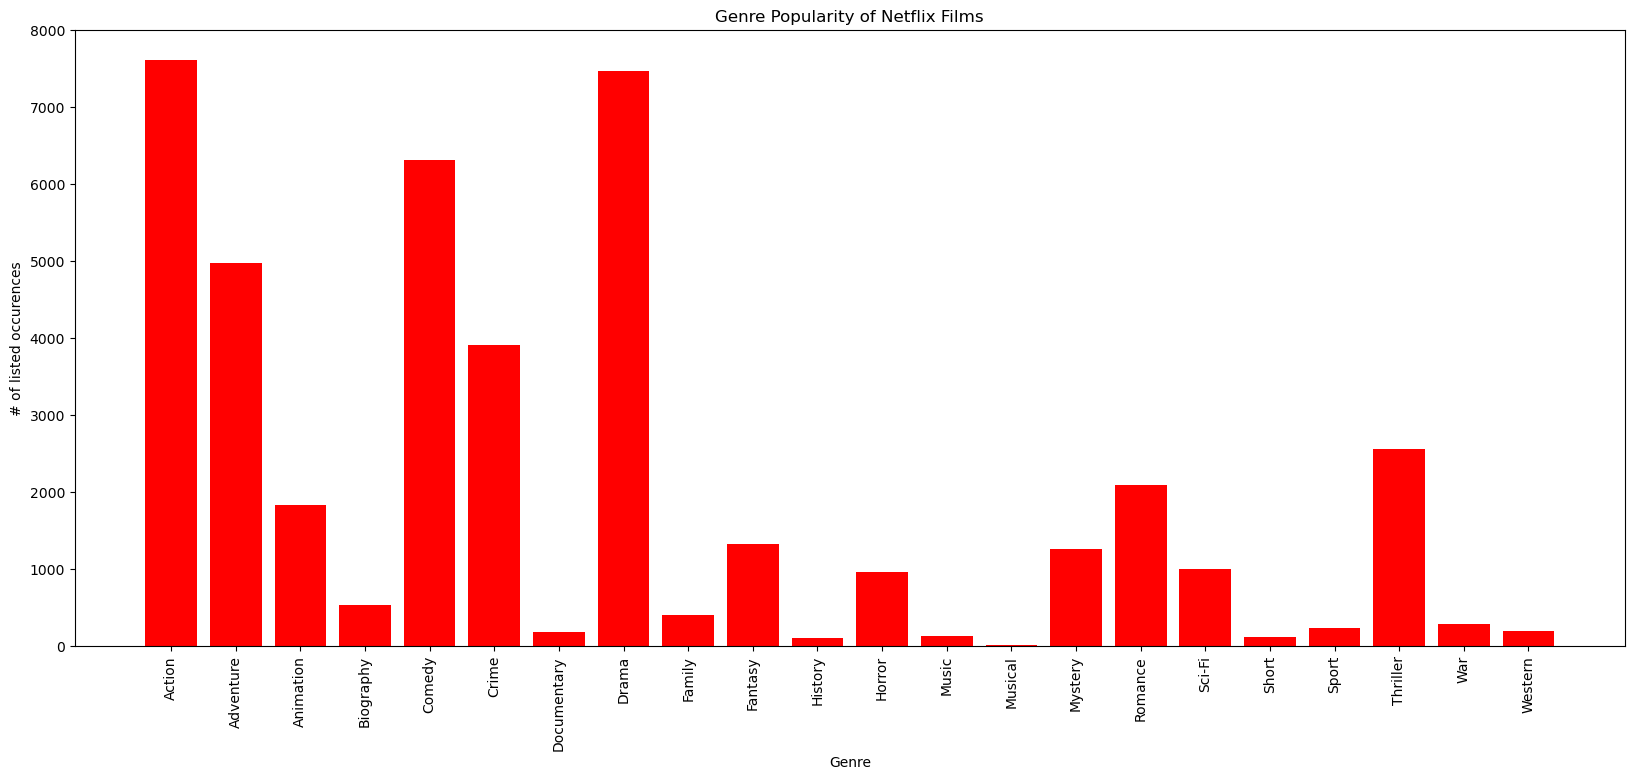

In [56]:
#Chart overall genre popularity in Netflix films
genre_type = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 
              'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Short', 'Sport',
              'Thriller', 'War', 'Western']
#Found by adding together the number of occurences in each list above
total_genre_count = [7621, 4976, 1829, 536, 6322, 3907, 182, 7473, 408, 
                     1334, 110, 970, 137, 10, 1263, 2090, 997, 124, 238,
                     2567, 291, 192]
                     

plt.figure(figsize=(20,8))
plt.bar(genre_type, total_genre_count, align = "center", color = 'r')
tick_locations = [value for value in genre_type]
plt.xticks(tick_locations, genre_type, rotation = "vertical")
plt.xlabel("Genre")
plt.ylabel("# of listed occurences")
plt.title("Genre Popularity of Netflix Films")

plt.show()


The top 5 Netflix genres overall are:
1. Action
2. Drama
3. Comedy
4. Adventure
5. Crime

Calculate Genre data for top 3 Netflix Countries: USA, UK, and Brazil

In [36]:
#Make dataframe and calculate genres for the USA
us_df = organized_genres_country.loc[organized_genres_country['country_name'] == 'United States']
us_counts = []
us1 = us_df['Genre 1'].value_counts()
us_counts.append(us1)
us2 = us_df['Genre 2'].value_counts()
us_counts.append(us2)
us3 = us_df['Genre 3'].value_counts()
us_counts.append(us3)
us4 = us_df['Genre 4'].value_counts()
us_counts.append(us4)
us_counts


[Action         40
 Comedy         24
 Animation      20
 Drama          15
 Crime           5
 Documentary     4
 Adventure       4
 Biography       3
 Mystery         2
 Family          2
 Horror          1
 Name: Genre 1, dtype: int64,
  Adventure    34
  Drama        26
  Crime        12
  Romance      12
  Thriller      7
  Fantasy       6
  Comedy        5
  War           3
  Horror        2
  Mystery       2
  Action        2
  Music         2
  Family        1
 Name: Genre 2, dtype: int64,
  Comedy       19
  Thriller     17
  Drama        12
  Mystery       6
  Crime         6
  Fantasy       5
  Romance       4
  Horror        4
  Family        3
  History       2
  Adventure     2
  Sport         2
  Western       2
 Name: Genre 3, dtype: int64,
 Series([], Name: Genre 4, dtype: int64)]

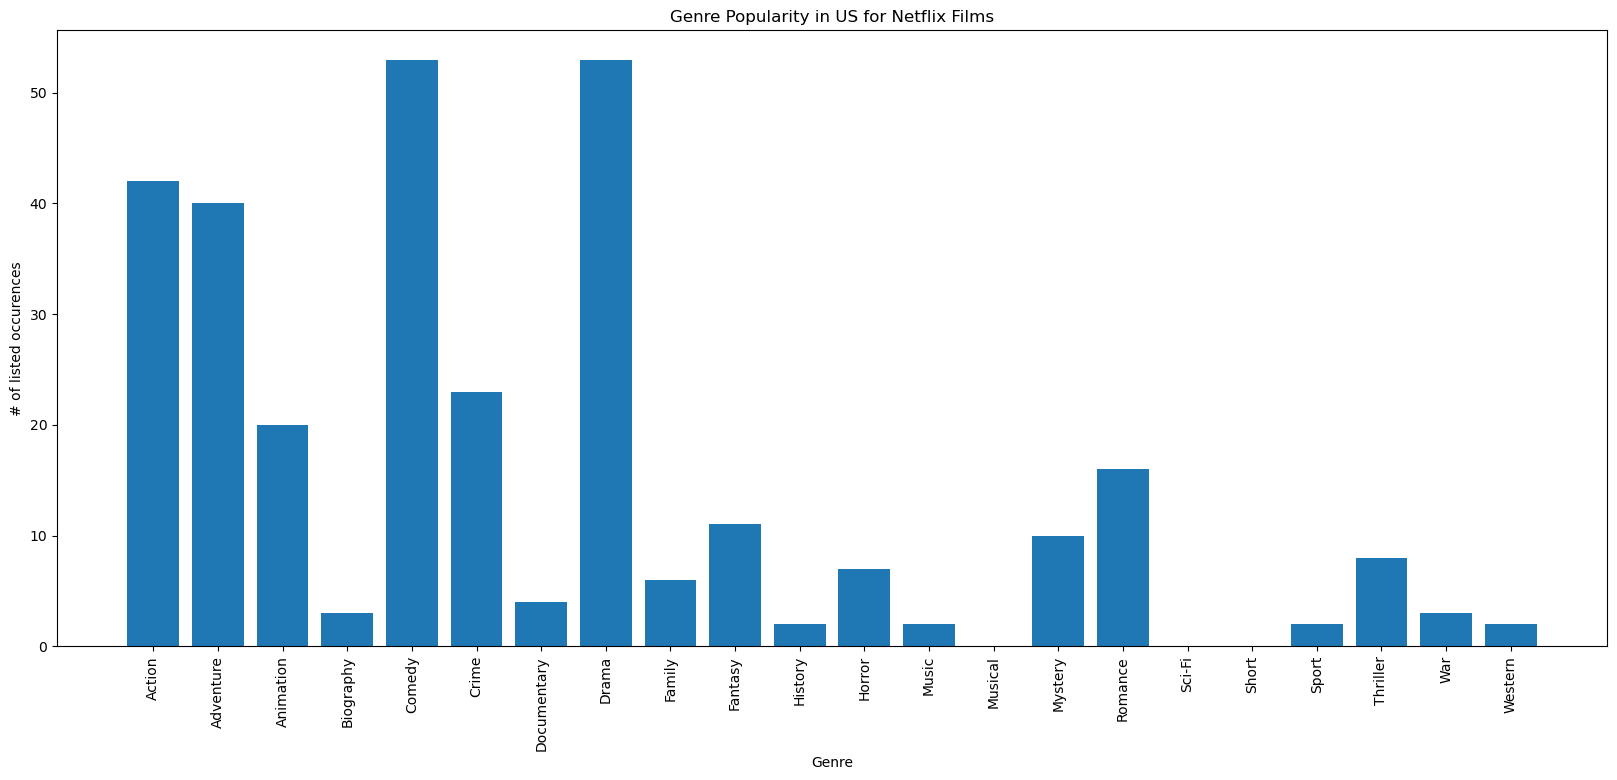

In [37]:
#Chart US genre popularity
genre_type = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 
              'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Short', 'Sport',
              'Thriller', 'War', 'Western']
#Found by adding together the number of occurences in each list above
us_genre_count = [42, 40, 20, 3, 53, 23, 4, 53, 6, 
                 11, 2, 7, 2, 0, 10, 16, 0, 0, 2,
                 8, 3, 2]
                    
plt.figure(figsize=(20,8))
plt.bar(genre_type, us_genre_count, align = "center")
tick_locations = [value for value in genre_type]
plt.xticks(tick_locations, genre_type, rotation = "vertical")
plt.xlabel("Genre")
plt.ylabel("# of listed occurences")
plt.title("Genre Popularity in US for Netflix Films")

plt.show()


In [40]:
#Make dataframe and calculate genres for the UK
uk_df = organized_genres_country.loc[organized_genres_country['country_name'] == 'United Kingdom']
uk_counts = []
uk1 = uk_df['Genre 1'].value_counts()
uk_counts.append(uk1)
uk2 = uk_df['Genre 2'].value_counts()
uk_counts.append(uk2)
uk3 = uk_df['Genre 3'].value_counts()
uk_counts.append(uk3)
uk4 = uk_df['Genre 4'].value_counts()
uk_counts.append(uk4)
uk_counts


[Action         80
 Comedy         33
 Animation      25
 Drama          12
 Crime          12
 Biography       6
 Documentary     4
 Adventure       3
 Horror          3
 Short           2
 Mystery         1
 Family          1
 Name: Genre 1, dtype: int64,
  Adventure    55
  Drama        40
  Crime        19
  Romance      13
  Comedy       11
  Thriller     11
  Sci-Fi        6
  Action        5
  Biography     5
  Fantasy       4
  War           3
  Horror        2
  History       2
  Western       1
  Mystery       1
 Name: Genre 2, dtype: int64,
  Thriller     32
  Comedy       27
  Drama        21
  Fantasy      13
  Sci-Fi       11
  Crime        10
  Adventure     5
  Romance       4
  Horror        3
  Sport         3
  Mystery       3
  Family        2
  Western       2
  War           1
  History       1
 Name: Genre 3, dtype: int64,
 Series([], Name: Genre 4, dtype: int64)]

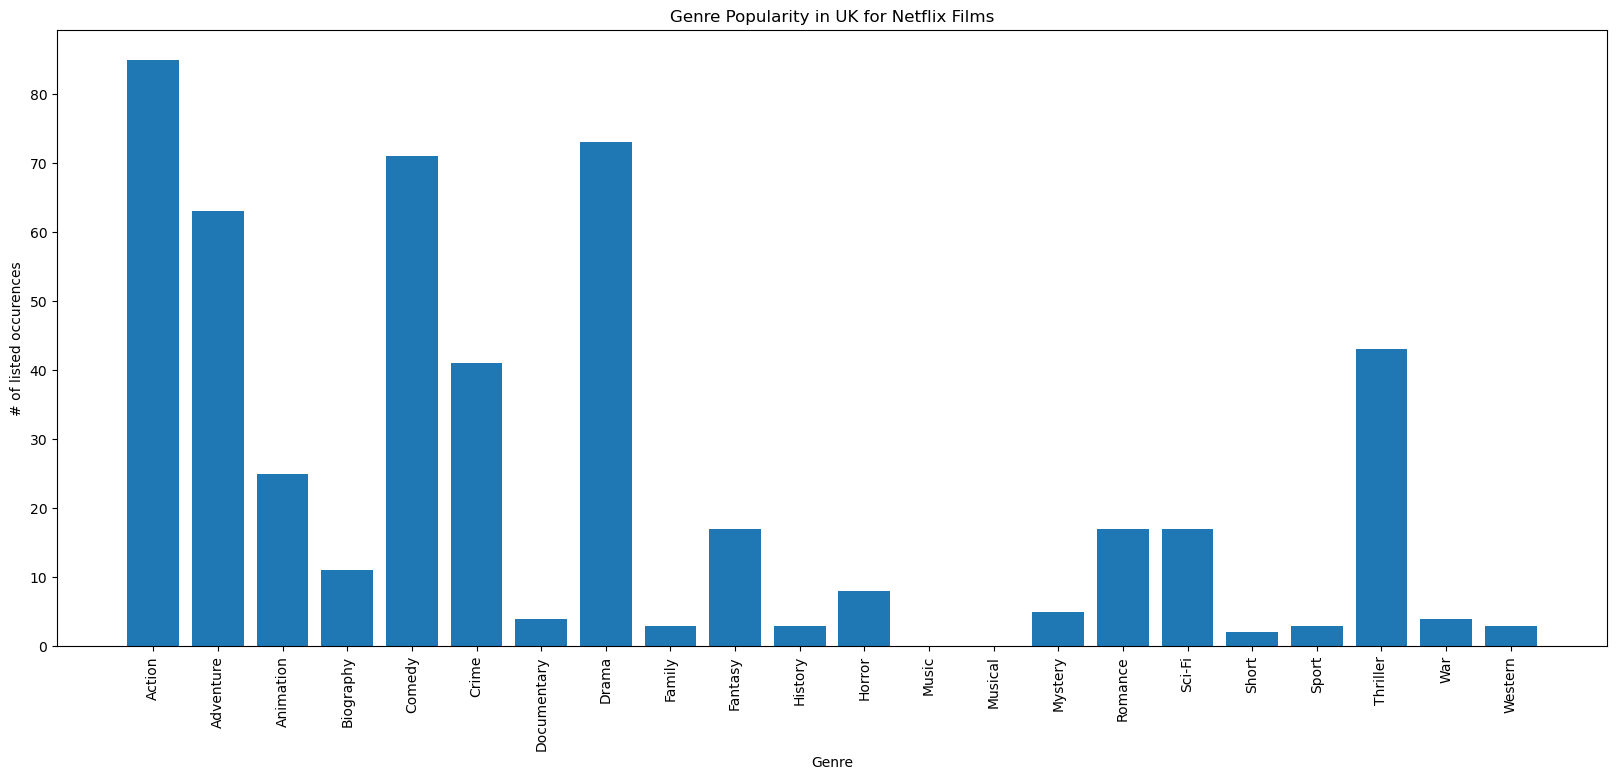

In [41]:
#Chart UK Genre popularity
genre_type = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 
              'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Short', 'Sport',
              'Thriller', 'War', 'Western']
#Found by adding together the number of occurences in each list above
uk_genre_count = [85, 63, 25, 11, 71, 41, 4, 73, 3, 
                  17, 3, 8, 0, 0, 5, 17, 17, 2, 3, 
                 43, 4, 3]
                 
plt.figure(figsize=(20,8))
plt.bar(genre_type, uk_genre_count, align = "center")
tick_locations = [value for value in genre_type]
plt.xticks(tick_locations, genre_type, rotation = "vertical")
plt.xlabel("Genre")
plt.ylabel("# of listed occurences")
plt.title("Genre Popularity in UK for Netflix Films")

plt.show()

In [42]:
#Make dataframe and calculate genres for Brazil
br_df = organized_genres_country.loc[organized_genres_country['country_name'] == 'Brazil']
br_counts = []
br1 = br_df['Genre 1'].value_counts()
br_counts.append(br1)
br2 = br_df['Genre 2'].value_counts()
br_counts.append(br2)
br3 = br_df['Genre 3'].value_counts()
br_counts.append(br3)
br4 = br_df['Genre 4'].value_counts()
br_counts.append(br4)
br_counts


[Action         71
 Comedy         34
 Animation      26
 Drama          17
 Crime           7
 Adventure       5
 Horror          5
 Biography       2
 Mystery         2
 Family          1
 Documentary     1
 Fantasy         1
 Name: Genre 1, dtype: int64,
  Adventure    41
  Drama        33
  Crime        24
  Romance      16
  Thriller     13
  Comedy       11
  Action        7
  Horror        6
  Mystery       4
  Fantasy       3
  War           2
  Family        1
  Short         1
  Sci-Fi        1
 Name: Genre 2, dtype: int64,
  Thriller     24
  Comedy       21
  Drama        21
  Sci-Fi       10
  Fantasy       9
  Crime         9
  Mystery       8
  Adventure     7
  Romance       3
  Family        3
  Western       2
  Horror        1
  Sport         1
 Name: Genre 3, dtype: int64,
 Series([], Name: Genre 4, dtype: int64)]

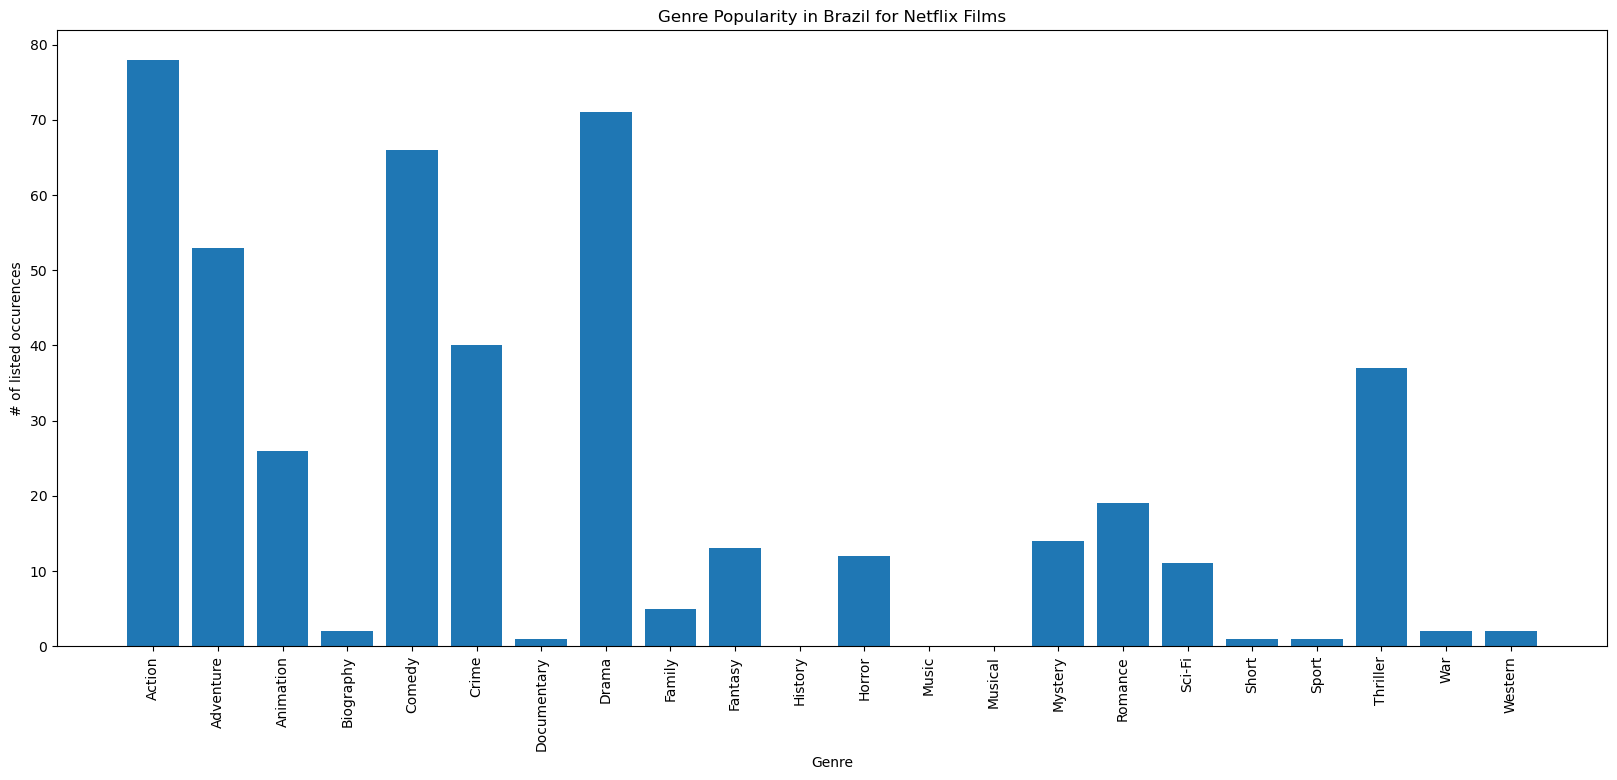

In [43]:
#Chart Brazil Genre Popularity
genre_type = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 
              'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Short', 'Sport',
              'Thriller', 'War', 'Western']
#Found by adding together the number of occurences in each list above
br_genre_count = [78, 53, 26, 2, 66, 40, 1, 71, 5, 
                 13, 0, 12, 0, 0, 14, 19, 11, 1, 1, 
                 37, 2, 2]
                 
plt.figure(figsize=(20,8))
plt.bar(genre_type, br_genre_count, align = "center")
tick_locations = [value for value in genre_type]
plt.xticks(tick_locations, genre_type, rotation = "vertical")
plt.xlabel("Genre")
plt.ylabel("# of listed occurences")
plt.title("Genre Popularity in Brazil for Netflix Films")

plt.show()

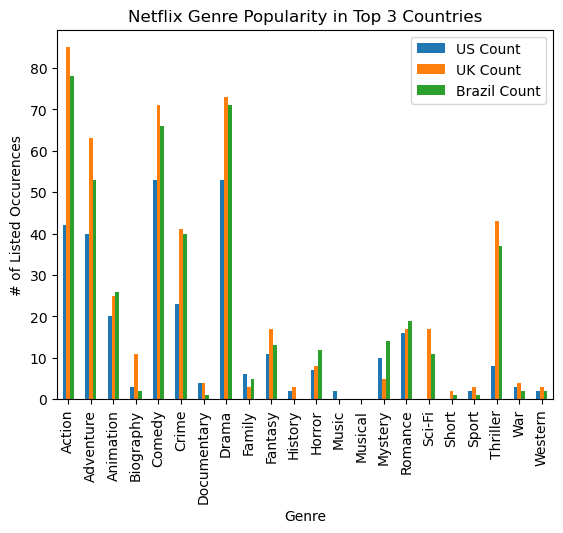

In [50]:
#plot all three countries together
genre_type = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 
              'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Short', 'Sport',
              'Thriller', 'War', 'Western']
us_genre_count = [42, 40, 20, 3, 53, 23, 4, 53, 6, 
                 11, 2, 7, 2, 0, 10, 16, 0, 0, 2,
                 8, 3, 2]
uk_genre_count = [85, 63, 25, 11, 71, 41, 4, 73, 3, 
                  17, 3, 8, 0, 0, 5, 17, 17, 2, 3, 
                 43, 4, 3]

br_genre_count = [78, 53, 26, 2, 66, 40, 1, 71, 5, 
                 13, 0, 12, 0, 0, 14, 19, 11, 1, 1, 
                 37, 2, 2]
top3_df = pd.DataFrame({'Genre': genre_type,
                       'US Count': us_genre_count,
                       'UK Count': uk_genre_count,
                       'Brazil Count': br_genre_count})


top3_df.plot(x="Genre", y=["US Count", "UK Count", "Brazil Count"], kind="bar")
plt.title("Netflix Genre Popularity in Top 3 Countries")
plt.xlabel("Genre")
plt.ylabel("# of Listed Occurences")
plt.show()

Top 3 Genres for each country:
United States: 
    1st/2nd: Comedy and Drama are tied
    3rd: Action
United Kingdom: 
    1st: Action
    2nd: Drama
    3rd: Comedy
Brazil: 
    1st: Action
    2nd: Drama
    3rd: Comedy

The top 3 genres are the same as the overall genre preference leading us to believe that there is not a big difference in film preference across different countries. The United States did see a difference in the top 3's order but they all have the same film type listed in the top rankings. Outside of the top 3, there is a heightened interest in the thriller genre for both the UK and Brazil. For the UK, thriller even breaks into their top 5 genres. But in the overall chart, thriller still ranked sixth. 

Netflix could use this data when deciding what content they want in their library and what projects to create moving forward as Netflix original films have become more popular. It would be clear which genres (action, comedy, and drama) to stick to in order to generate the most streams/success.  